In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,f1_score,recall_score

Read the dataset using pandas

In [74]:
data=pd.read_csv(r"C:\Users\USER\Desktop\Models\Iris_Data\IRIS.xls")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [76]:
data.shape

(150, 5)

In [77]:
#For finding the statastical analysis of the datase, we can use describe function.
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [78]:
for i in data:
    print(i)
    print(data[i].value_counts())
    print('---------------')

sepal_length
5.0    10
5.1     9
6.3     9
5.7     8
6.7     8
5.8     7
5.5     7
6.4     7
4.9     6
5.4     6
6.1     6
6.0     6
5.6     6
4.8     5
6.5     5
6.2     4
7.7     4
6.9     4
4.6     4
5.2     4
5.9     3
4.4     3
7.2     3
6.8     3
6.6     2
4.7     2
7.6     1
7.4     1
7.3     1
7.0     1
7.1     1
5.3     1
4.3     1
4.5     1
7.9     1
Name: sepal_length, dtype: int64
---------------
sepal_width
3.0    26
2.8    14
3.2    13
3.1    12
3.4    12
2.9    10
2.7     9
2.5     8
3.5     6
3.3     6
3.8     6
2.6     5
2.3     4
3.7     3
2.4     3
2.2     3
3.6     3
3.9     2
4.4     1
4.0     1
4.1     1
4.2     1
2.0     1
Name: sepal_width, dtype: int64
---------------
petal_length
1.5    14
1.4    12
5.1     8
4.5     8
1.6     7
1.3     7
5.6     6
4.7     5
4.9     5
4.0     5
4.2     4
5.0     4
4.4     4
4.8     4
1.7     4
3.9     3
4.6     3
5.7     3
4.1     3
5.5     3
6.1     3
5.8     3
3.3     2
5.4     2
6.7     2
5.3     2
5.9     2
6.0     2
1.2  

In [79]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [80]:
data.duplicated().any()

True

In [81]:
data.drop_duplicates()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


There is no missing values in the given dataset.
Duplicates row is present, droped the rows.


In [82]:
data['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

**VISUALIZATION**

Text(0.5, 0.98, 'Count')

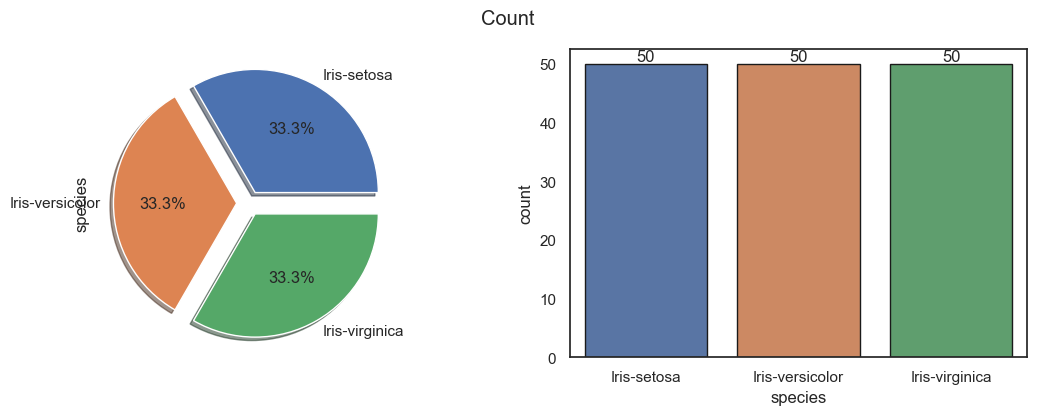

In [83]:
sns.set(style='white')
fig = plt.subplots(1,2,figsize = (13,4))
plt.subplot(1,2,1)
data['species'].value_counts().plot.pie(explode=[0.1,0.1,0.1], autopct='%1.1f%%', shadow=True)
plt.subplot(1,2,2)
ax=sns.countplot(data=data, x='species',edgecolor = 'k')
ax.bar_label(ax.containers[0])
plt.suptitle('Count')

C:\Users\USER\AppData\Local\Temp\ipykernel_13732\1011646420.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))


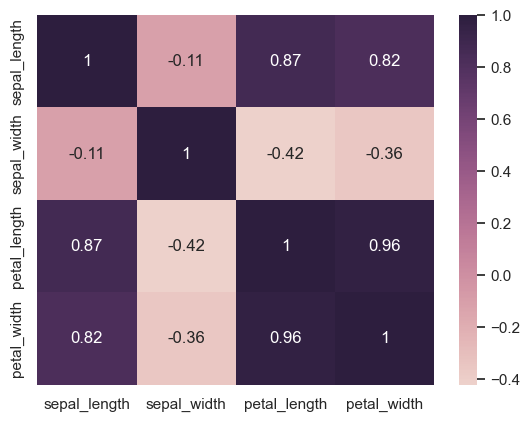

In [84]:
sns.heatmap(data.corr(),annot=True,cmap=sns.cubehelix_palette(as_cmap=True))
plt.show()

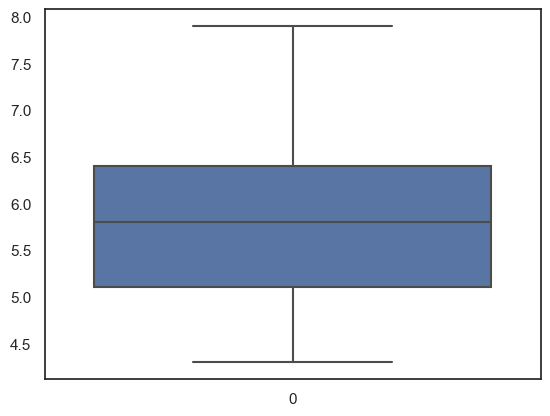

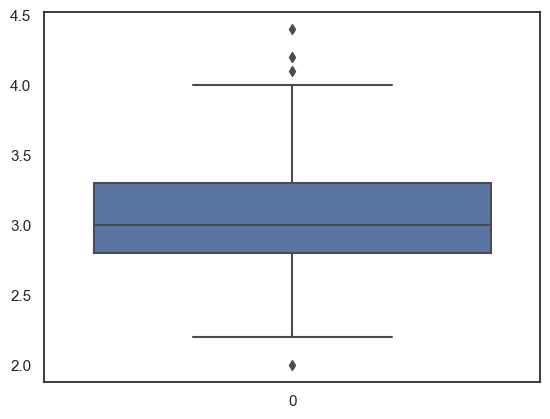

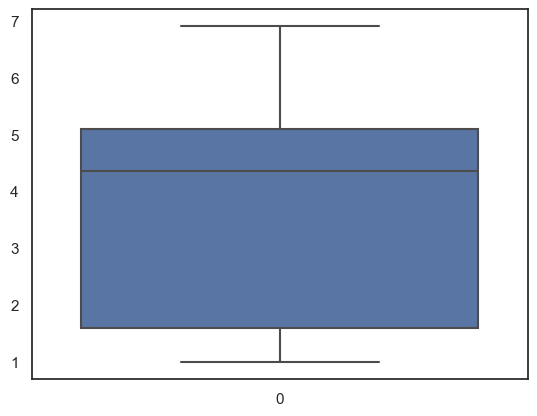

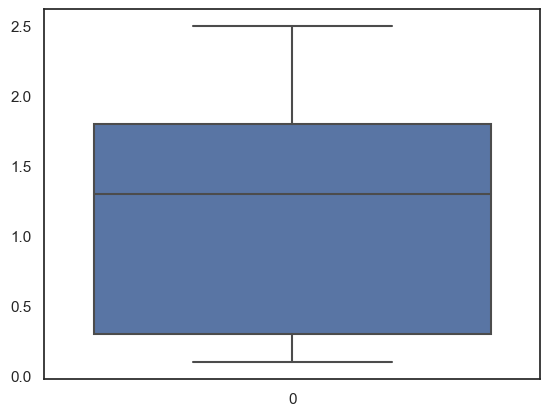

In [85]:
for i in data.select_dtypes(include=['int','float']):
    sns.boxplot(data[i])
    plt.show()

In [86]:
df=data.copy()

Our target column is categorical, so we need to convert it to numeric.

In [87]:
lb=LabelEncoder()
df['species']=lb.fit_transform(df['species'])

In [88]:
mm=MinMaxScaler()
a=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
for i in a:
    df[i]=mm.fit_transform(df[[i]])

In [89]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.439167,0.467571,0.457778,1.000000
std,0.230018,0.180664,0.299054,0.317984,0.819232
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,1.000000
75%,0.583333,0.541667,0.694915,0.708333,2.000000
max,1.000000,1.000000,1.000000,1.000000,2.000000


In [90]:
x=df.drop(['species'],axis=1)
y=df['species']

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=132)

**Model Building**

In [92]:
def models(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test )
    print('Accuracy :',accuracy_score(y_test,y_pred))
    print('Precision:',precision_score(y_test,y_pred,average=None))
    print('recall   :',recall_score(y_test,y_pred,average=None))
    print('f1_score :',f1_score(y_test,y_pred,average=None))
    print()
    print('------------------------------------------------'
          )
    print()
    
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))

In [93]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy')
models(dt,x_train,x_test,y_train,y_test)

Accuracy : 0.8947368421052632
Precision: [1.         0.875      0.84615385]
recall   : [1.         0.875      0.84615385]
f1_score : [1.         0.875      0.84615385]

------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.88      0.88      0.88        16
           2       0.85      0.85      0.85        13

    accuracy                           0.89        38
   macro avg       0.91      0.91      0.91        38
weighted avg       0.89      0.89      0.89        38

[[ 9  0  0]
 [ 0 14  2]
 [ 0  2 11]]


In [94]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=30,criterion='entropy')
models(rf,x_train,x_test,y_train,y_test)

Accuracy : 0.9210526315789473
Precision: [1.         0.93333333 0.85714286]
recall   : [1.         0.875      0.92307692]
f1_score : [1.         0.90322581 0.88888889]

------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      0.88      0.90        16
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

[[ 9  0  0]
 [ 0 14  2]
 [ 0  1 12]]


In [95]:
from sklearn.svm import SVC

svm=SVC(kernel='linear')
models(svm,x_train,x_test,y_train,y_test)

Accuracy : 0.9473684210526315
Precision: [1.         0.9375     0.92307692]
recall   : [1.         0.9375     0.92307692]
f1_score : [1.         0.9375     0.92307692]

------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.94      0.94      0.94        16
           2       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.95      0.95      0.95        38
weighted avg       0.95      0.95      0.95        38

[[ 9  0  0]
 [ 0 15  1]
 [ 0  1 12]]


In [96]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier(n_neighbors=5)
models(kn,x_train,x_test,y_train,y_test)

Accuracy : 0.9210526315789473
Precision: [1.         0.93333333 0.85714286]
recall   : [1.         0.875      0.92307692]
f1_score : [1.         0.90322581 0.88888889]

------------------------------------------------

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       0.93      0.88      0.90        16
           2       0.86      0.92      0.89        13

    accuracy                           0.92        38
   macro avg       0.93      0.93      0.93        38
weighted avg       0.92      0.92      0.92        38

[[ 9  0  0]
 [ 0 14  2]
 [ 0  1 12]]
